<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CClustering_200701a_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering



# Setup the notebook

In [ ]:
import scipy.io as sio
import numpy.matlib as nm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# colab does not play well with %matplotlib notebook, you can try "%matplotlib notebook" when you run it in local machine 
#%matplotlib inline
mpl.rcParams.update({'figure.figsize': (8,6)})

In [ ]:
# Import all the data files
!wget -O Unsupervised_data_200706a.zip https://drive.google.com/u/0/uc?id=1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub&export=download
!unzip Unsupervised_data_200706a.zip


--2021-07-19 21:57:56--  https://drive.google.com/u/0/uc?id=1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.101, 74.125.141.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lh47rmd609bi5v888ho8e9umhknksjv6/1626731850000/07808887398243303382/*/1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub [following]
--2021-07-19 21:57:57--  https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lh47rmd609bi5v888ho8e9umhknksjv6/1626731850000/07808887398243303382/*/1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub
Resolving doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)|1

# Load data

## Load ternary

In [ ]:
t = sio.loadmat('bc_unsupervised.mat')
cmp = t['CMP']
tth = t['TTH']
xrd = t['XRD']
tth_ = nm.repmat(tth,xrd.shape[0],1)

xy = nm.zeros((cmp.shape[0],2))
xy[:,1] = nm.array(cmp[:,2]*0.8660,ndmin = 2).T
xy[:,0] = nm.add(cmp[:,1], xy[:,1].T*0.5774).T

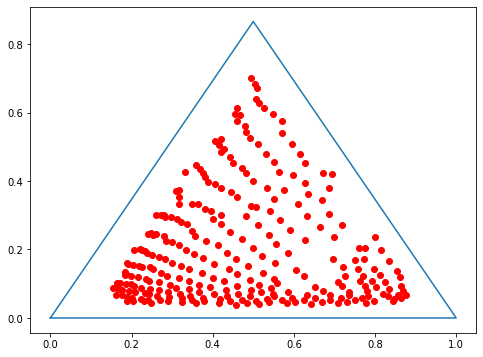

In [ ]:
#%%
plt.figure(1)
plt.clf()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0])
plt.plot(xy[:,0],xy[:,1],'ro')

## Generate demo dataset

Text(0.5, 1.0, 'Raw data')

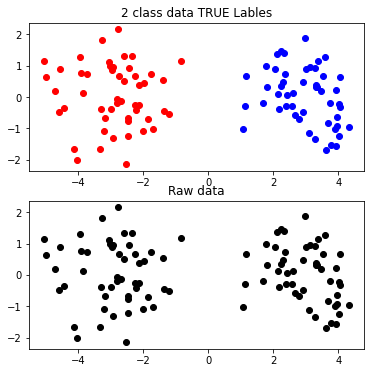

In [ ]:
#%% Set up demo dataset
# generate dataset from 2 Gaussians.

distance_between_cluster_centers = 6

# generate data
x1 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x2 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x1[:,0] = x1[:,0] - distance_between_cluster_centers/2
x2[:,0] = x2[:,0] + distance_between_cluster_centers/2
x = nm.concatenate((x1, x2), axis=0)

plt.figure(figsize = (6,6))
plt.clf()
plt.subplot(2,1,1)
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')
plt.title('2 class data TRUE Lables')

plt.subplot(2,1,2)
plt.plot(x1[:,0],x1[:,1],'ko')
plt.plot(x2[:,0],x2[:,1],'ko')
plt.title('Raw data')

# Clustering

### K-means clustering on demo dataset

[1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


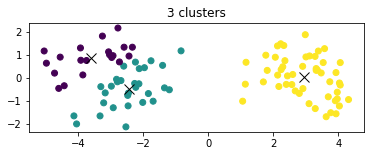

In [ ]:
from sklearn.cluster import KMeans
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, init = 'random').fit(x)
L = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize = (6,2))
plt.subplot(1,1,1)
plt.cla()
plt.scatter(x[:,0], x[:,1], c = L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'kx',markersize = 10)
plt.title( str(k) + ' clusters')

# Try varying the number of of clusters
# & 
# Try varying the distance between the clusters
#
# Try running a few times to see different results
print(L)

## K-means clustering on ternary dataset (with MDS mapping)

### Apply MDS to ternary dataset

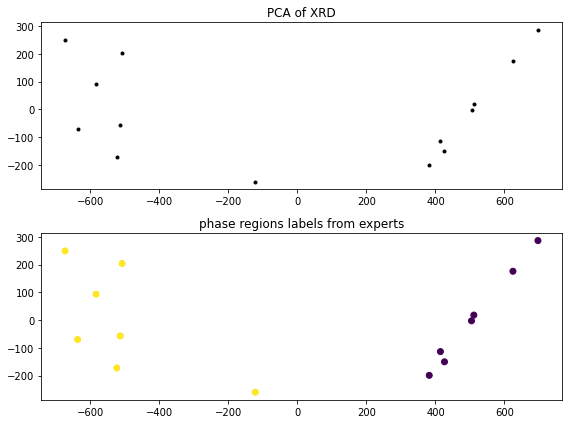

In [ ]:
#Apply k-means to MDS results!

# compute MDS for XRD
xrd1 = xrd[0:7,:] # data set 1
xrd2 = xrd[189:196,:] # data set 2
s = nm.concatenate((xrd1, xrd2), axis=0) # Combine data into one matrix.

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA

pca = PCA().fit(s)
loading_vectors = pca.components_
explained_variance = pca.explained_variance_
pos = pca.transform(s)

# plot the MDS mapping
plt.figure(4)
plt.clf()
plt.subplot(2,1,1)
plt.plot(pos[:,0],pos[:,1],'k.')
plt.title('PCA of XRD')

# Plot the correct phase region labels
class_labels = nm.repeat(1,14)
class_labels[0:7] = 2
plt.subplot(2,1,2)
plt.scatter(pos[:,0],pos[:,1],c =class_labels)
plt.title('phase regions labels from experts')
plt.tight_layout()

### Run k-means on the PCA mapping


Text(0.5, 1.0, 'k-means results')

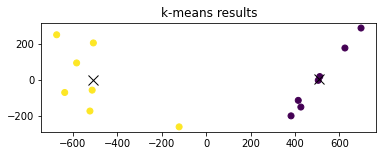

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, random_state = 0).fit(pos)
L = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
plt.figure(figsize = (6,2))
plt.subplot(1,1,1)
# plt.cla()
plt.scatter(pos[:,0],pos[:,1],c = L)
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'kx', markersize=10)
plt.title('k-means results')


### Representative results


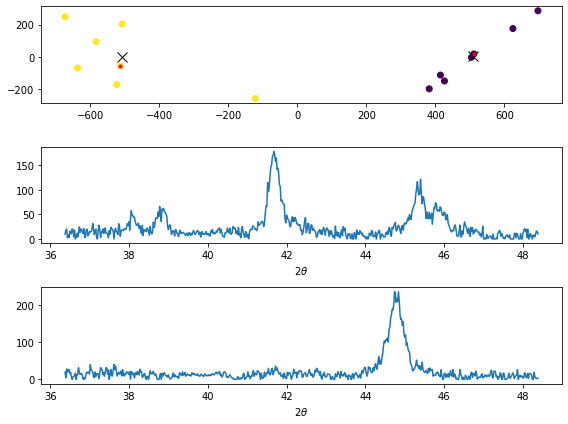

In [ ]:
# find the distance between the cluster centers and the MDS points
d = pairwise_distances(nm.concatenate((cluster_centers, pos), axis=0))

# find the MDS points closest to the cluster centers
cluster1_rep = nm.argmin(d[0,2:],axis = 0)
cluster2_rep = nm.argmin(d[1,2:],axis = 0)

# plot the cluster centers and indicate which point is closest to each center.
plt.figure(6)
plt.clf()
plt.subplot(3,1,1)
plt.scatter(pos[:,0],pos[:,1],c =L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'kx',markersize=10)
plt.plot(pos[cluster1_rep,0], pos[cluster1_rep,1],'r.')
plt.plot(pos[cluster2_rep,0], pos[cluster2_rep,1],'r.')

# plot the XRD for the sample closest to the cluster 1 center
plt.subplot(3,1,2)
plt.plot(nm.ravel(tth), s[cluster1_rep,:])
plt.xlabel(r'2$\theta$')

# plot the XRD for the sample closest to the cluster 2 center
plt.subplot(3,1,3)
plt.plot(nm.ravel(tth), s[cluster2_rep,:])
plt.xlabel(r'2$\theta$')
plt.tight_layout()

## K-medoids clustering on ternary dataset (with MDS mapping)

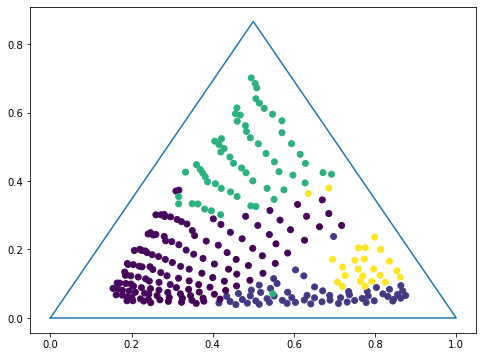

In [ ]:
# import the k-medoids method from downloaded python file
from kmedoids_MLMR import cluster

# We're going to use kmedoids with Cosine dissimilarity
d = pairwise_distances(xrd, metric = 'cosine')

# Assume 5 clusters, plot clustering result
k = 5
L, kmed = cluster(d, k = 5)
plt.figure(7)
plt.clf()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0])
plt.scatter(nm.ravel(xy[:,0]), nm.ravel(xy[:,1]), c = L)

# Try running a few times. See if it changes.

## Gap Statistic: Identify the optimal number of clusters

In [ ]:
# generate data set from 2 Gaussians.
x1 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x2 = nm.random.normal(loc = 0,scale = 1, size = (50,2))
x1[:,0] = x1[:,0] - 3
x2[:,0] = x2[:,0] + 3
x = nm.concatenate((x1, x2), axis=0)

x_ref = nm.random.uniform(size = (100,2))

Text(0.5, 1.0, 'Reference data')

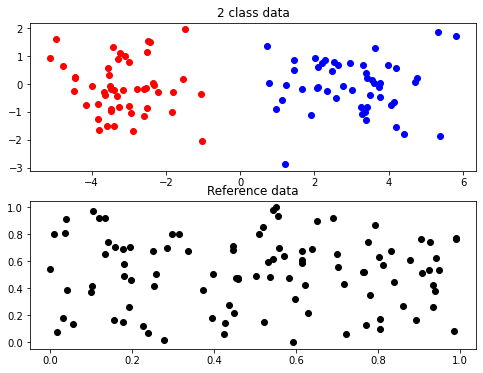

In [ ]:
# plot the data from the 2 gaussians
plt.figure(8)
plt.clf()
plt.subplot(2,1,1)
plt.plot(x1[:,0],x1[:,1],'ro')
plt.plot(x2[:,0],x2[:,1],'bo')
plt.title('2 class data')

# plot the data from the uniform distribution
plt.subplot(2,1,2)
plt.plot(x_ref[:,0],x_ref[:,1],'ko')
plt.title('Reference data')

In [ ]:
# import the gap statistic functions from the class folder
from gap_MLMR import gap_statistic, find_optimal_k

# get the gap statistics data
# number of clusters attempted K = 1 through 10
gaps, sk, Kg, LogW, ExpectedLogW = gap_statistic(x, B = 10, K = range(1,11), N_init = 10)

# compute the optimal number of clusters
K_optimal = find_optimal_k(gaps, sk, Kg)

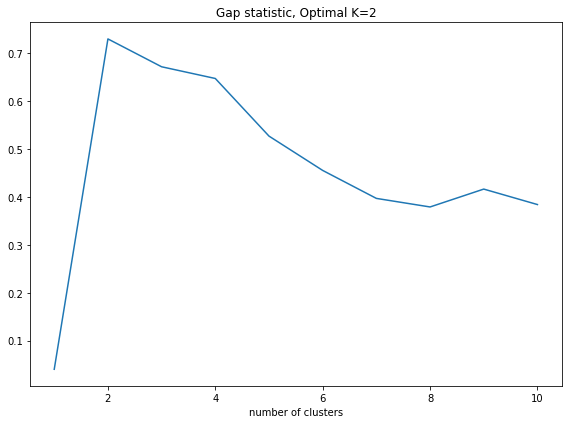

In [ ]:
# plot the gap statistic and indicate the optimal K
plt.figure(9)
plt.subplot(1,1,1)
plt.plot(Kg,gaps)
plt.title('Gap statistic, Optimal K=' + str(K_optimal))
plt.xlabel('number of clusters')
plt.tight_layout()

## Hierarchical Cluster Analysis on ternary dataset

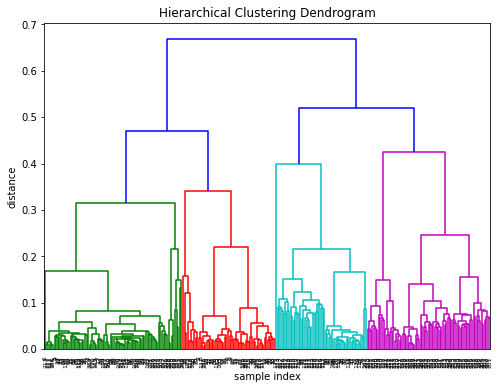

In [ ]:
#import Hierarchical Cluster Analysis
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# compute dissimilarity measure using cosine metric
# and create linkages for dendrogram
# linkages describe the merge points of the dendrogram.
Z = linkage(xrd, 'average', metric = 'cosine')

# plot dendrogram
plt.figure(10)
plt.clf()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

# rotates the x axis labels
dendrogram(Z, leaf_rotation=90., leaf_font_size=6.);

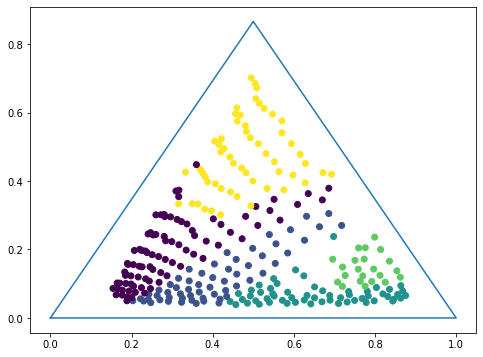

In [ ]:
# identify HCA labels for 5 clusters
L = fcluster(Z, 5, criterion='maxclust')

# plot the results
plt.figure(11)
plt.clf()
plt.plot([0,1,.5,0],[0,0,nm.sqrt(.75),0])
plt.scatter(nm.ravel(xy[:,0]),nm.ravel(xy[:,1]),c = L);

In [ ]:
temp = [1,2,3,4,5]
print(type(temp), temp)
temp = np.asarray([1,2,3,4,5])
print(type(temp), temp)
temp = np.asarray([[1,2],[3,4]])
print(temp,type(temp))

<class 'list'> [1, 2, 3, 4, 5]
<class 'numpy.ndarray'> [1 2 3 4 5]
[[1 2]
 [3 4]] <class 'numpy.ndarray'>


## Gaussian Mixture Models on demo dataset

### Generate demo data

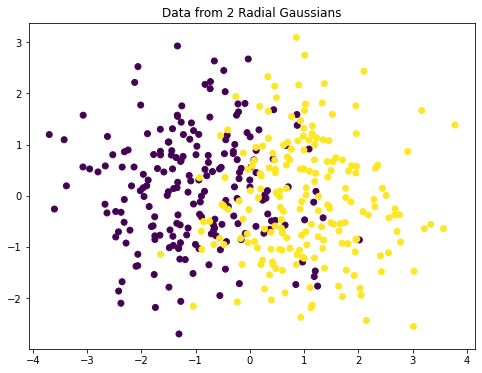

In [ ]:
# generate data set from 2 Gaussians.
d = 2.
N = 200
x1 = nm.random.normal(loc = 0, scale = 1, size = (N,2))
x2 = nm.random.normal(loc = 0, scale = 1, size = (N,2))
x1[:,0] = x1[:,0] - d/2.
x2[:,0] = x2[:,0] + d/2.
x = nm.concatenate((x1, x2), axis=0)

# assign true labels to L
L_true = nm.repeat(1,2*N)
L_true[N:-1] = 2

# plot the data
plt.figure(12)
plt.clf()
plt.subplot(1,1,1)
plt.scatter(x[:,0], x[:,1], c = L_true)
plt.title('Data from 2 Radial Gaussians');

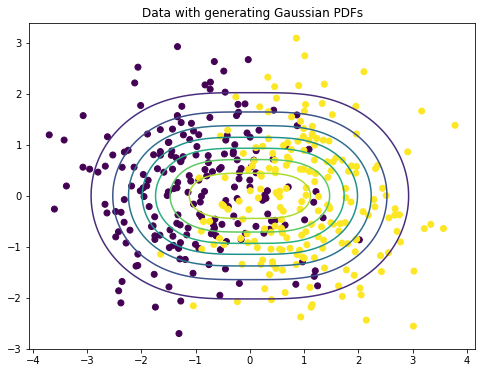

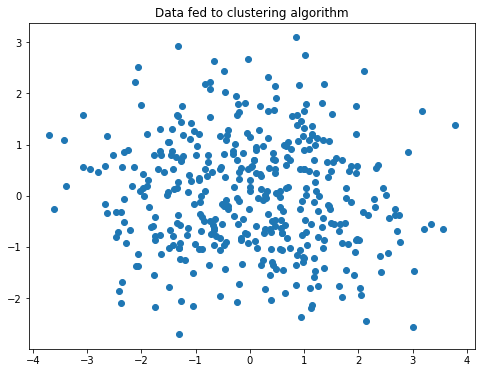

In [ ]:
# Visualize the true Gaussian distribution
# https://matplotlib.org/examples/pylab_examples/contour_demo.html
from scipy.stats import multivariate_normal

delta = 0.025
xv = nm.arange(-1.5*d, 1.5*d, delta)
yv = nm.arange(-3.0, 3.0, delta)
X, Y = nm.meshgrid(xv, yv)
pos = np.dstack((X, Y))
Z1 = multivariate_normal([-d/2, 0], [[1, 0], [0, 1]])
Z2 = multivariate_normal([d/2, 0], [[1, 0], [0, 1]])
# difference of Gaussians
Z = Z2.pdf(pos) + Z1.pdf(pos)

plt.figure(13)
plt.subplot(1,1,1)
plt.cla()
plt.scatter(x[:,0], x[:,1], c = L_true)
plt.contour(X, Y, Z)
plt.title('Data with generating Gaussian PDFs');

plt.figure()
plt.subplot(1,1,1)
plt.cla()
plt.scatter(x[:,0], x[:,1])
# plt.contour(X, Y, Z)
plt.title('Data fed to clustering algorithm');

### Fit gaussian mixture model

In [ ]:
#%% fit the gaussian model
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2, covariance_type='diag').fit(x)

# obtain the cluster labels, cluster means and variances
L = gmm.predict(x)
gm = gmm.means_
gc = gmm.covariances_
out = gmm.predict_proba(x)
print(out.shape)

(400, 2)


(240, 240)


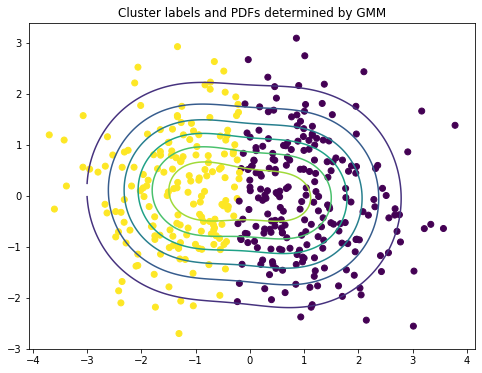

In [ ]:
# Visualize gaussian model results
Z1 = multivariate_normal([gm[0,0], gm[0,1]], [[gc[0,0], 0], [0, gc[0,1]]])
Z2 = multivariate_normal([gm[1,0], gm[1,1]], [[gc[1,0], 0], [0, gc[1,1]]])

# difference of Gaussians
Z = Z2.pdf(pos) + Z1.pdf(pos)

plt.figure(14)
plt.subplot(1,1,1)
plt.cla()

# here we plot the clustering results
plt.scatter(x[:,0], x[:,1], c = L)

# here we plot the GMM determined gaussian PDFs
plt.contour(X, Y, Z)
plt.title('Cluster labels and PDFs determined by GMM')
print(Z1.pdf(pos).shape)

## Spectral Clustering on ring dataset

### Generate ring dataset

In [ ]:
# generate ring data
N = 360
t = nm.linspace(0, 6.28, N)
# outer ring
x1 = 5*nm.cos(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])
y1 = 5*nm.sin(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])
# inner ring
x2 = 3*nm.cos(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])
y2 = 3*nm.sin(t) + .2 * nm.random.normal(loc = 0, scale = 1, size = t.shape[0])

x = nm.concatenate((x1, x2), axis=0)
y = nm.concatenate((y1, y2), axis=0)

X = nm.zeros((2*N,2))
X[:,0] = nm.expand_dims(x, axis=1)
X[:,1] = nm.expand_dims(y, axis=1)

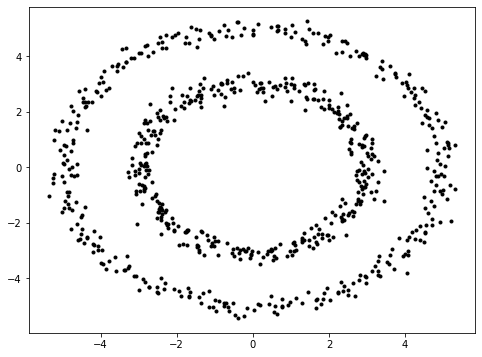

In [ ]:
#%%
# plot data
plt.figure(15)
plt.clf()
plt.subplot(1,1,1)
plt.plot(x,y,'k.')

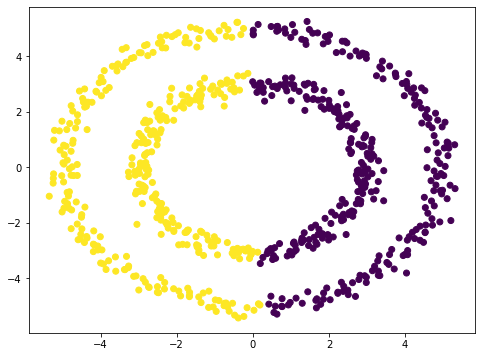

In [ ]:
# cluster using kmeans
kmeans = KMeans(n_clusters=2, random_state = 0).fit(X)
L = kmeans.labels_

# plot results
plt.figure(16)
plt.subplot(1,1,1)
plt.cla()
plt.scatter(x, y, c = L)

### Run spectral clustering 

In [ ]:
#%% Do the spectral clustering algorithm!
# Or can use the function: from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# mix the samples!
#X = X[np.random.permutation(2*N),:]

# compute the euclidean dissimilarity matrix
d = pairwise_distances(X,metric = 'euclidean')

# find the 10 nearest neighbors
dist, ind = NearestNeighbors(n_neighbors = 10).fit(X).kneighbors(X, return_distance = True)
mdist = dist[:,-1]

# For all points greater than 10 NN, set value to max distance of all points
maxdist = np.max(nm.ravel(d))
d_ = nm.ones((d.shape[0],d.shape[1])) * maxdist
# For all points greater than 10 NN, set value to max distance of all points
for i in range(0,X.shape[0]):
    d_[i,ind[i,]] = d[i,ind[i,]]
    d_[ind[i,],i] = d[ind[i,],i]
d = d_

# convert dissimilarity matrix to similarity matrix
W = nm.exp( -.5*nm.power(d,2) )
# Similarity of sample i to sample i is set to 0
for i in range(0,W.shape[0]):
    W[i,i] = 0
    
# create the diagonal matrix with node volumes D
eps = 1E-10
degs = nm.ravel(W.sum(axis = 1))
D = nm.diag(degs)

# Compute the unnormalized Laplacian
L = D - W

# create inv(D)
degs[degs == 0] = eps
Dinv = nm.diag(1./degs)

# compute normalized Laplacian inv(D)*L
L = nm.matmul(Dinv, L)

# Us eigen analysis on normalized L
w, v = nm.linalg.eig(L)
w = np.absolute(w)
v = np.absolute(v)

# order the eigen values (and vectors) from smallest to largest
# and take the 2 smallest
k = 2
#
sort_index = np.argsort(w)
w = w[sort_index[np.arange(0,k)]]
v = v[:,sort_index[np.arange(0,k)]]

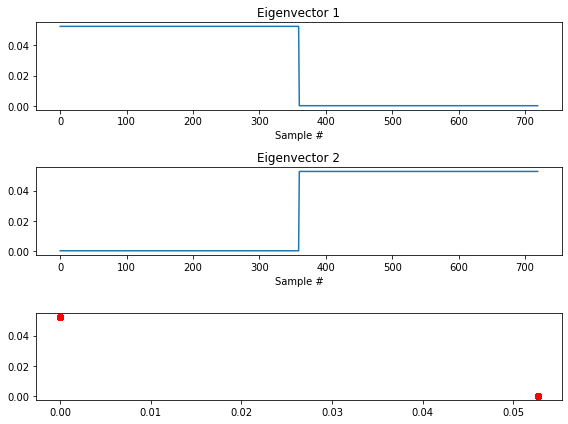

In [ ]:
#%% Plot the eigenvectors
plt.figure(17)
plt.clf()
plt.subplot(3,1,1)
plt.plot(np.arange(0,X.shape[0]),np.ravel(v[:,0]))
plt.xlabel('Sample #')
plt.title('Eigenvector 1')
plt.subplot(3,1,2)
plt.plot(np.arange(0,X.shape[0]),np.ravel(v[:,1]))
plt.xlabel('Sample #')
plt.title('Eigenvector 2')
# plot the points in terms of the eigenvectors
plt.subplot(3,1,3)
plt.plot(np.ravel(v[:,0]),np.ravel(v[:,1]),'ro')

plt.tight_layout()

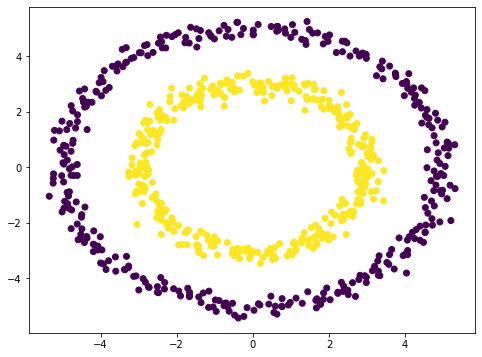

In [ ]:
#%% run k-means on this mapped points.
kmeans = KMeans(n_clusters=2, random_state = 0).fit(v)
L_SC = kmeans.labels_

# Plot the results!
plt.figure(18)
plt.subplot(1,1,1)
plt.scatter(x,y,c = L_SC)

### What if X isn't in order by ring?

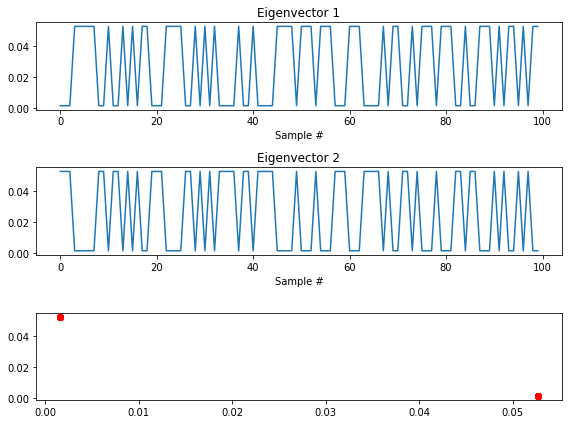

In [ ]:
X = X[np.random.permutation(2*N),:]

# compute the euclidean dissimilarity matrix
d = pairwise_distances(X,metric = 'euclidean')

# find the 10 nearest neighbors
dist, ind = NearestNeighbors(n_neighbors = 10).fit(X).kneighbors(X, return_distance = True)
mdist = dist[:,-1]

# For all points greater than 10 NN, set value to max distance of all points
maxdist = np.max(nm.ravel(d))
d_ = nm.ones((d.shape[0],d.shape[1])) * maxdist
# For all points greater than 10 NN, set value to max distance of all points
for i in range(0,X.shape[0]):
    d_[i,ind[i,]] = d[i,ind[i,]]
    d_[ind[i,],i] = d[ind[i,],i]
d = d_

# convert dissimilarity matrix to similarity matrix
W = nm.exp( -.5*nm.power(d,2) )
# Similarity of sample i to sample i is set to 0
for i in range(0,W.shape[0]):
    W[i,i] = 0
    
# create the diagonal matrix with node volumes D
eps = 1E-10
degs = nm.ravel(W.sum(axis = 1))
D = nm.diag(degs)

# Compute the unnormalized Laplacian
L = D - W

# create inv(D)
degs[degs == 0] = eps
Dinv = nm.diag(1./degs)

# compute normalized Laplacian inv(D)*L
L = nm.matmul(Dinv, L)

# Us eigen analysis on normalized L
w, v = nm.linalg.eig(L)
w = np.absolute(w)
v = np.absolute(v)

# order the eigen values (and vectors) from smallest to largest
# and take the smallest
k = 2
#
sort_index = np.argsort(w)
w = w[sort_index[np.arange(0,k)]]
v = v[:,sort_index[np.arange(0,k)]]

plt.figure(18)
plt.clf()
plt.subplot(3,1,1)
plt.plot(np.arange(0,100),np.ravel(v[0:100,0]))
plt.xlabel('Sample #')
plt.title('Eigenvector 1')
plt.subplot(3,1,2)
plt.plot(np.arange(0,100),np.ravel(v[0:100,1]))
plt.xlabel('Sample #')
plt.title('Eigenvector 2')
# plot the points in terms of the eigenvectors
plt.subplot(3,1,3)
plt.plot(np.ravel(v[:,0]),np.ravel(v[:,1]),'ro')

kmeans = KMeans(n_clusters=2, random_state = 0).fit(v)
L_SC = kmeans.labels_

plt.tight_layout()

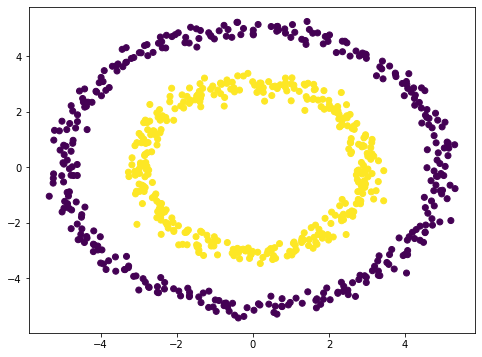

In [ ]:
# Plot the results!
plt.figure(19)
plt.scatter(nm.ravel(X[:,0]),nm.ravel(X[:,1]),c = L_SC)